# End to End demonstration

This notebook is intended to demonstrate the prolog/yap solver in action apllying for an existing puzzle or to a new random one.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from shapely.wkt import loads as wkt_loads

from setup_env.setup_db import setup_db
from utils.plot import plot_geometry, plot_solutions
from utils.db import connect_db
from utils.solver import run_yap_solver

In [2]:
# setups a new environment for the application to run
setup_db()

✅ Database disponibile!
✅ Database schemas created successfully!
✅ Tetrominoes inserted successfully!
✅ Puzzle examples inserted successfully!
✅ Example solutions uploaded successfully!
✅ Database setup completed.


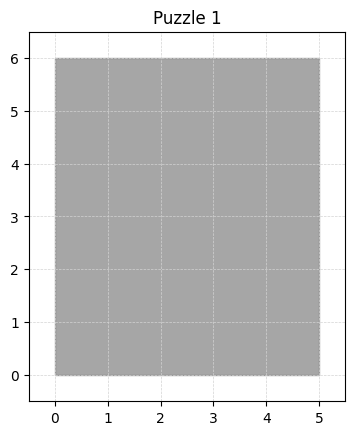

In [6]:
%matplotlib inline
## show initial example puzzle and example solution

conn = connect_db()
cur = conn.cursor()

query_puzzle = """
SELECT 
    id
    , name
    , ST_AsText(geom) 
FROM puzzles
WHERE id = 1; 
"""

cur.execute(query_puzzle)
puzzle = cur.fetchall()
geom=puzzle[0][2]
cur.close()
conn.close()

fig, ax = plt.subplots()
plot_geometry(ax=ax,geom=geom, color="gray",title="Puzzle 1")
plt.show()

In [4]:
## Show theoretical solution for puzzle 1. This one was created manually

from utils.place_tetrominos import example_place_tetrominoes
y = example_place_tetrominoes(tetromino='I', var_id = 1, dx= 5, dy= 0) 

print(y)

('POLYGON((5 1,6 1,7 1,8 1,9 1,9 0,8 0,7 0,6 0,5 0,5 1))',)


In [ ]:


run_yap_solver(puzzle_id=1)

Executing YAP command: yap -l /workspaces/project_tadb_fcup_20242025/solver/solver_app.pl -g test_solver(1), halt.
YAP script for puzzle 1 executed successfully.
STDOUT:
>>> init_my_lib called
>>> YAP_UserCPredicate transpose_geometry called
>>> YAP_UserCPredicate disjoint_geometry called
>>> YAP_UserCPredicate within_geometry called
>>> YAP_UserCPredicate - union_geometry called
>>> YAP_UserCPredicate - load_tetrominoes_list called
>>> YAP_UserCPredicate - load_puzzle called
>>> YAP_UserCPredicate - save_solution called
>>> init_my_lib ended
Loading solver.pl...
****** Loaded solver.pl successfully ******.
load_puzzle(1, P) returned: POLYGON((0 3,0 4,0 5,0 6,1 6,2 6,3 6,4 6,5 6,5 5,5 4,5 3,5 2,5 1,5 0,4 0,3 0,2 0,1 0,0 0,0 1,0 2,0 3))
[DEBUG_SOLVER] 🚀 Loading tetrominoes from DB...
[DEBUG_SOLVER] ✅ Loaded tetrominoes: [tetramino(I,1,POLYGON((0 1,1 1,2 1,3 1,4 1,4 0,3 0,2 0,1 0,0 0,0 1))),tetramino(I,2,POLYGON((0 0,0 1,0 2,0 3,0 4,1 4,1 3,1 2,1 1,1 0,0 0))),tetramino(O,1,POLYGON((0 1,0